In [39]:
import sys
print(sys.version)

from datetime import datetime, timedelta

from typing import List, Union

import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")

plt.rcParams["figure.figsize"] = (9, 3)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["axes.grid"] = True

import numpy as np
import pandas as pd

load = lambda x: pd.read_csv(
    x,
    index_col=0,
    header=0,
    parse_dates=["DATE"],
    date_parser=lambda d: datetime.strptime(d, "%Y-%m-%d")
)
# Load crude oil dataset
df = load("/Users/tianyudu/Documents/UToronto/Course/ECO499/ugthesis/data/ready_to_use/rpna_radius_0.3.csv")
df_raw = pd.read_csv("../data/ravenpack/crude_oil_all.csv")
df_oil = load("/Users/tianyudu/Documents/UToronto/Course/ECO499/ugthesis/data/ready_to_use/DCOILWTICO_FILLED.csv")

3.7.3 (default, Dec 13 2019, 19:58:14) 
[Clang 11.0.0 (clang-1100.0.33.17)]


In [40]:
total = df["NUM_POSITIVE_WESS"].sum() + df["NUM_NEGATIVE_WESS"].sum() + df["NUM_NEUTRAL_WESS"].sum()
print(df["NUM_NEGATIVE_WESS"].sum() / total * 100)
print(df["NUM_NEUTRAL_WESS"].sum() / total * 100)
print(df["NUM_POSITIVE_WESS"].sum() / total * 100)

42.853403141361255
13.989341810022438
43.15725504861631


In [41]:
fig_path = "/Users/tianyudu/Documents/UToronto/Course/ECO499/ugthesis/figures/case_studies/"

### Notes: using unweighted ESS in order to factor out explanatory power of other variables and illustrate the distribution of ESS.

In [51]:
def ts_centre_plot(
    df: pd.DataFrame,
    df_oil: pd.DataFrame,
    criterion: str,
    date: datetime,
    delta_days: int = 45,
    save_to: Union[str, None] = None
) -> None:
    delta = timedelta(days=delta_days)
    subset = np.logical_and(
        df.index >= date - delta,
        df.index <= date + delta
    )
    fig, ax = plt.subplots()

    ax.plot(df[f"NUM_POSITIVE_{criterion}"][subset], label="Positive")
    ax.plot(df[f"NUM_NEGATIVE_{criterion}"][subset], label="Negative")
    ax.plot(df[f"NUM_NEUTRAL_{criterion}"][subset], label="Neutral")

    ax.set_xlabel("Date")
    ax.set_ylabel(f"Num of Events ({criterion})")

    ax2=ax.twinx()
    ax2.plot(
        df_oil[np.logical_and(
            df_oil.index >= date - delta,
            df_oil.index <= date + delta
        )],
        color="blue",
        marker="o",
        label="WTI Crude Oil Price",
        alpha=0.5
    )
    ax2.set_ylabel("Crude Oil Price (USD)")

    # Option 1: Use vertical line to indicate event time.
#     plt.axvline(
#         x=date, 
#         linestyle="--", 
#         label=datetime.strftime(date, "%Y-%m-%d"),
#         linewidth=0.7,
#         alpha=0.7,
#         color="red"
#     )

    # Option 2: Use cross on x-axis to indicate event time.
    ax.scatter(date, 0, marker="x", s=60, color="red")
    ax.legend(loc="upper right")
    ax2.legend(loc="upper left")
    ax.grid(True)
    ax2.grid(False)
    
    if save_to is not None:
        plt.savefig(save_to, dpi=300)
    plt.show()

# Case 1: Nov. 30, 2016 (Positive Spike)

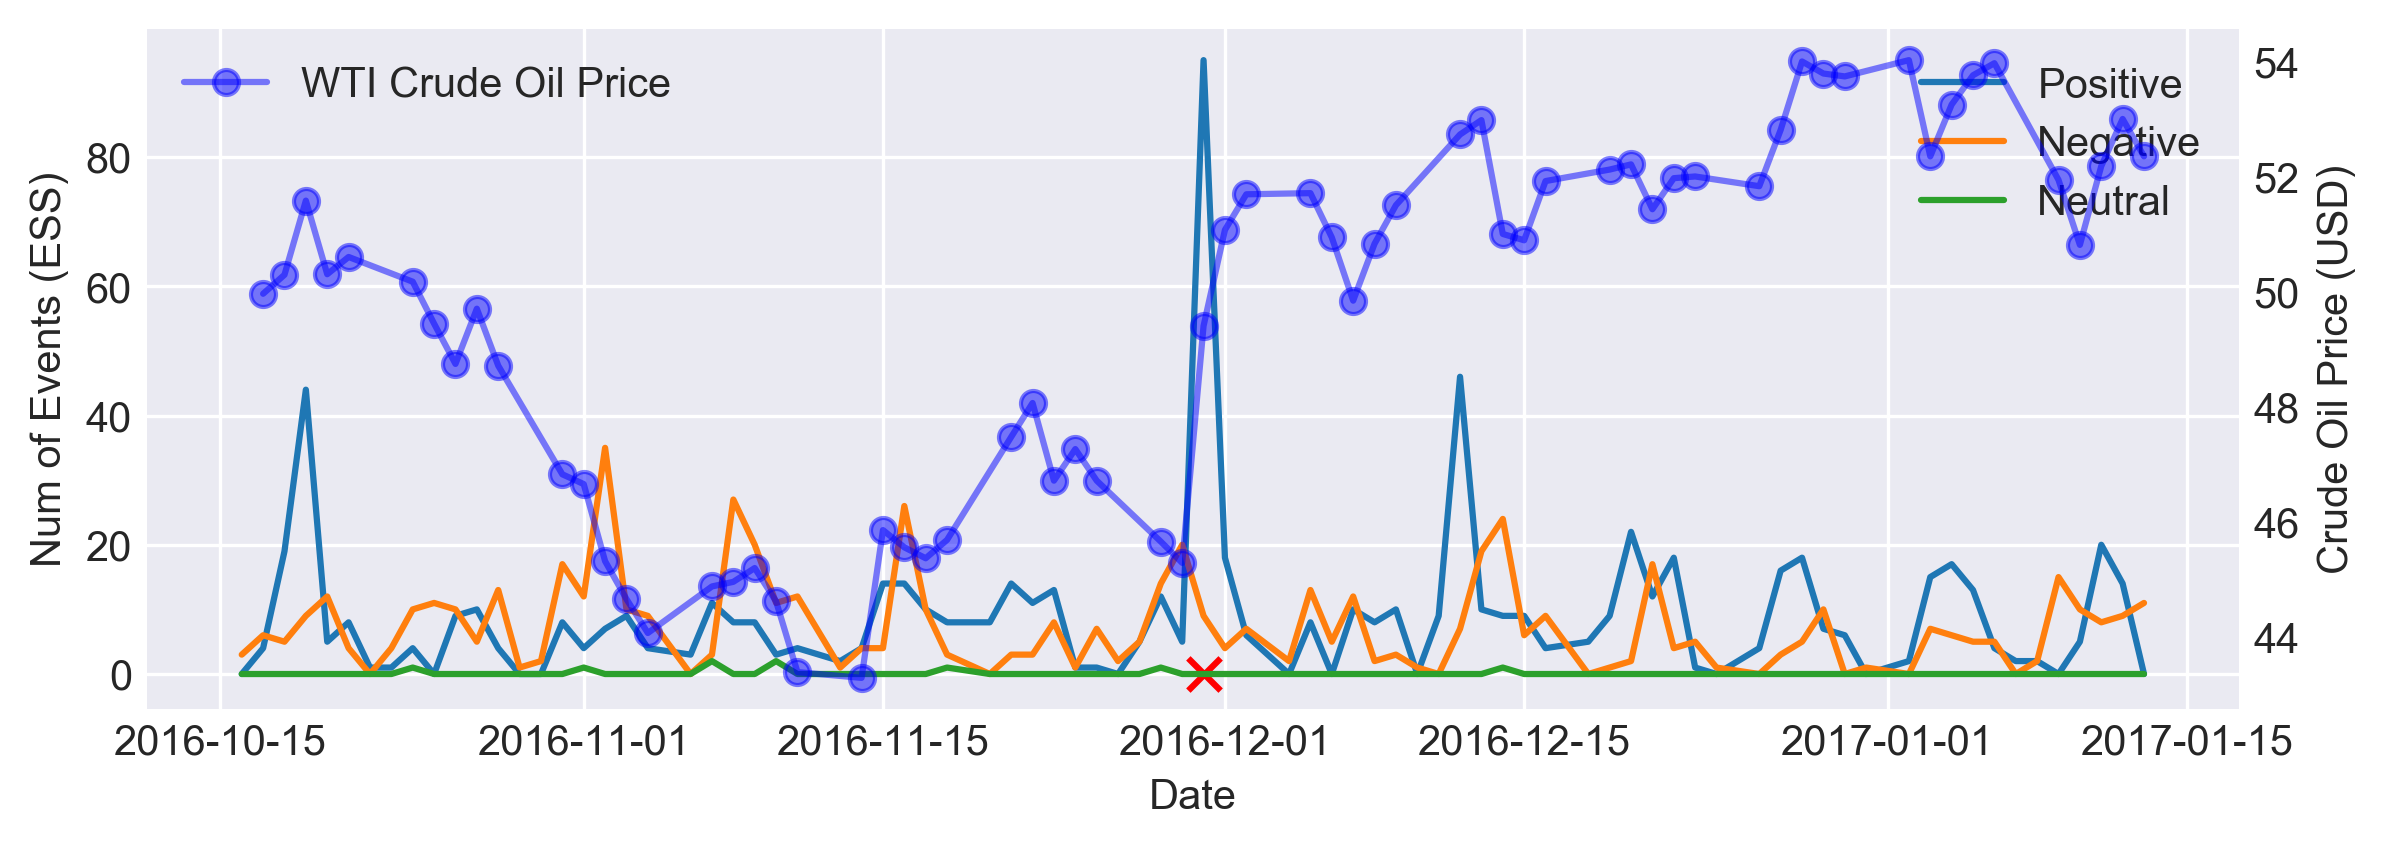

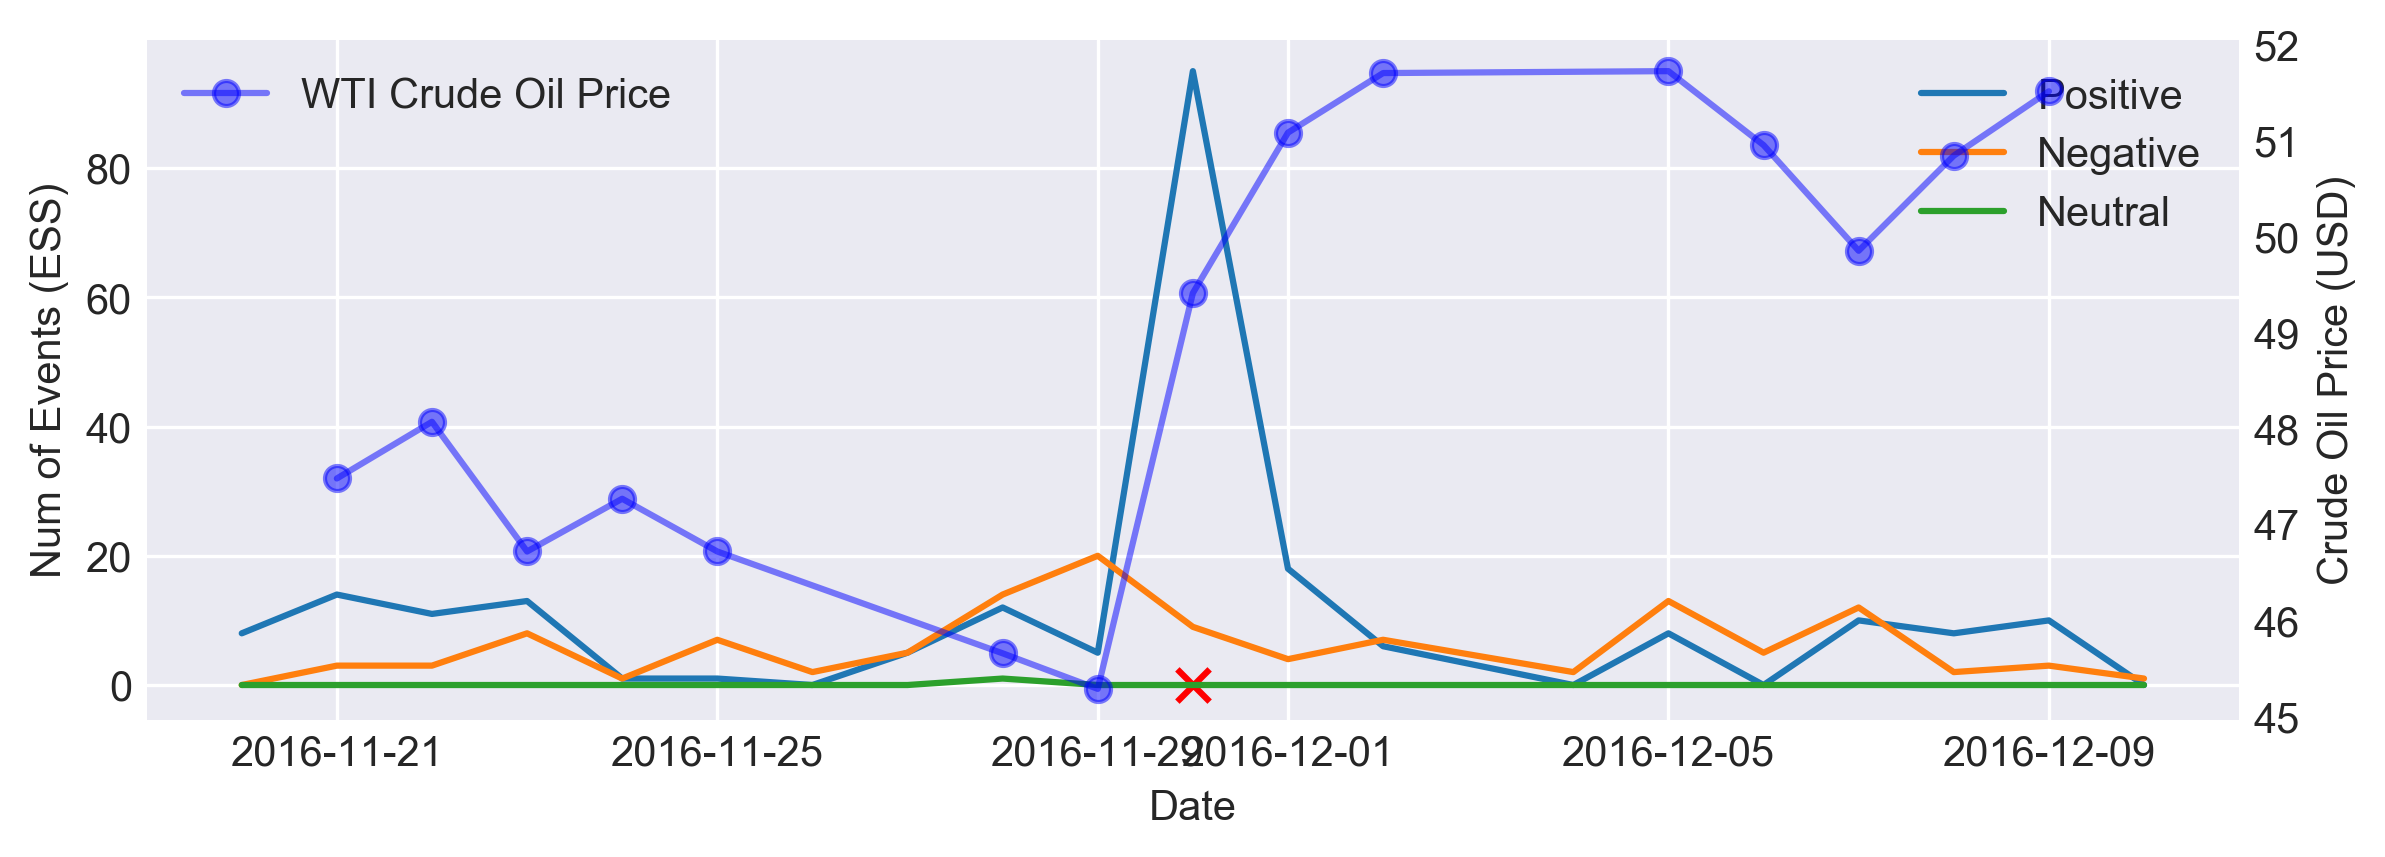

In [52]:
date = datetime(2016, 11, 30)
delta = timedelta(days=45)
ts_centre_plot(df, df_oil, "ESS", date, delta_days=45, save_to=fig_path+"20161130_45d.png")
ts_centre_plot(df, df_oil, "ESS", date, delta_days=10, save_to=fig_path+"20161130_10d.png")

# Case 2: Dec. 6, 2018 (Negative Spike)
> US becomes a net oil exporting country.

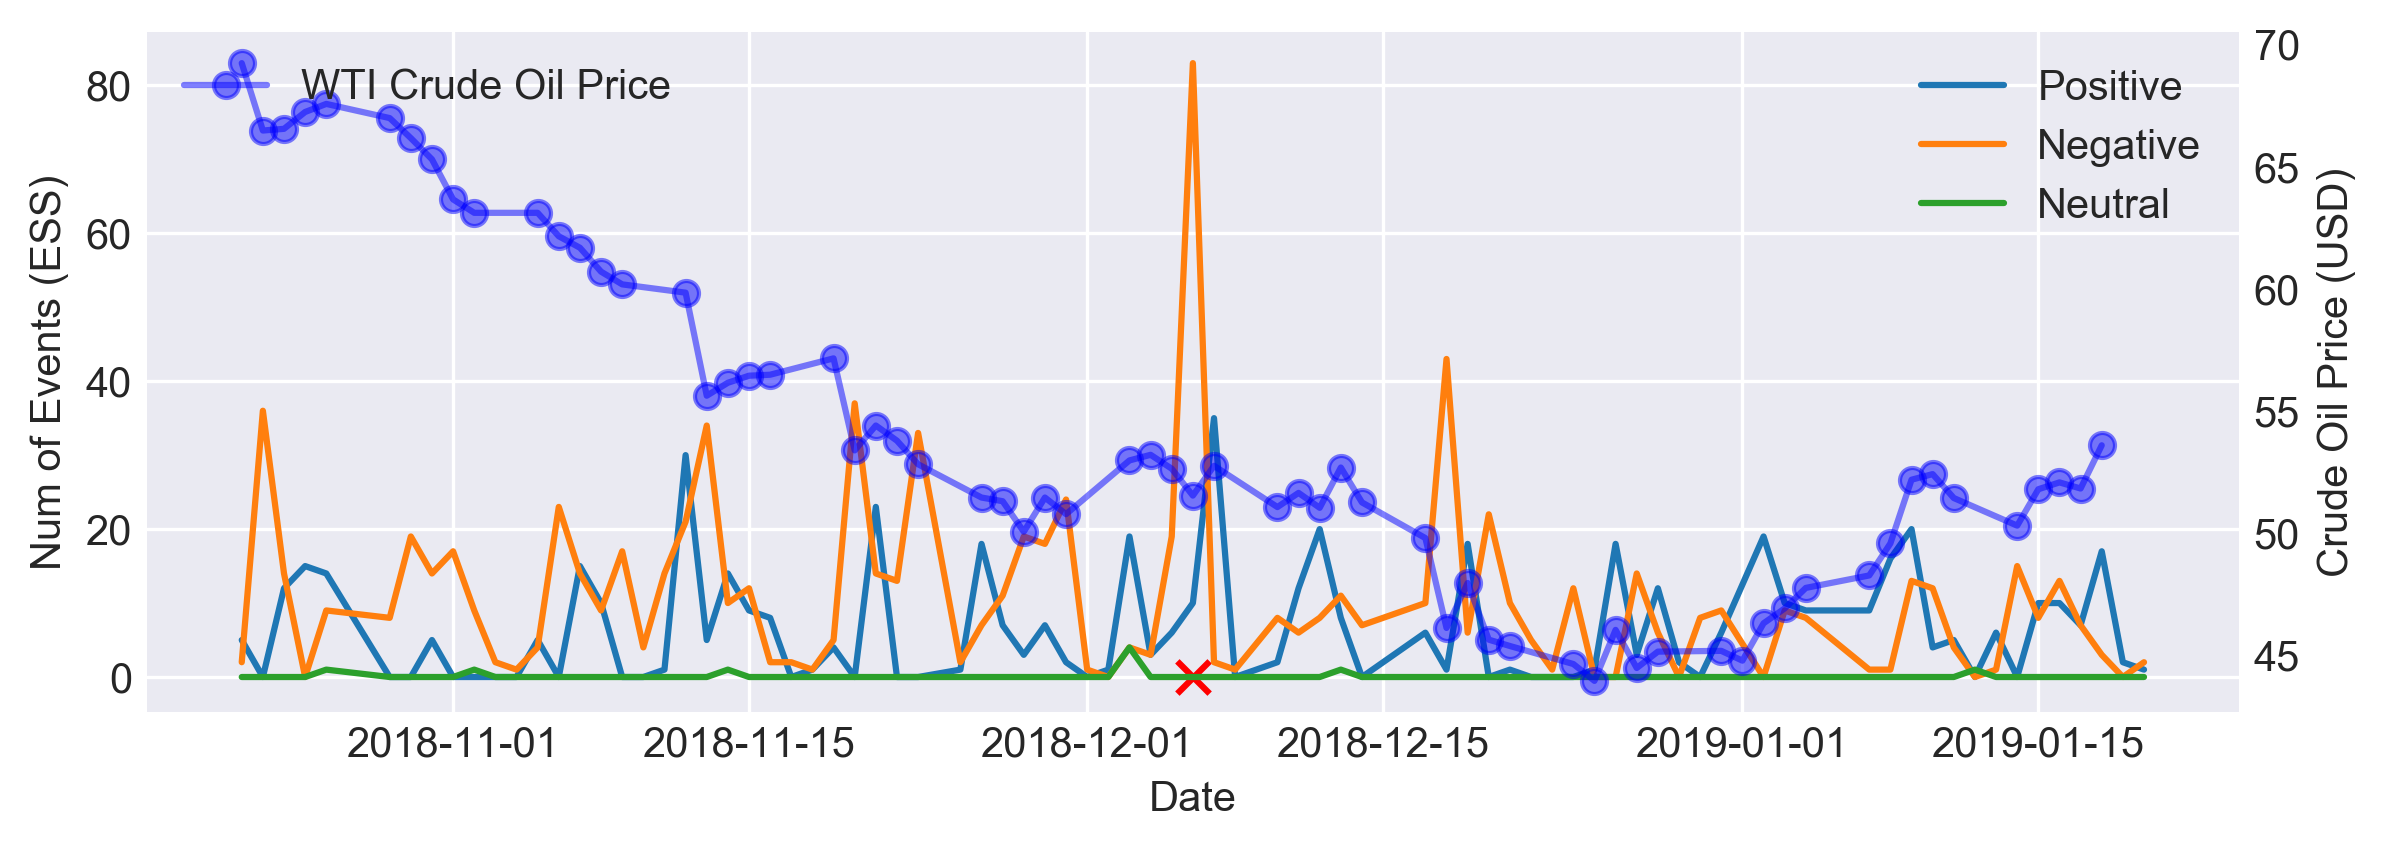

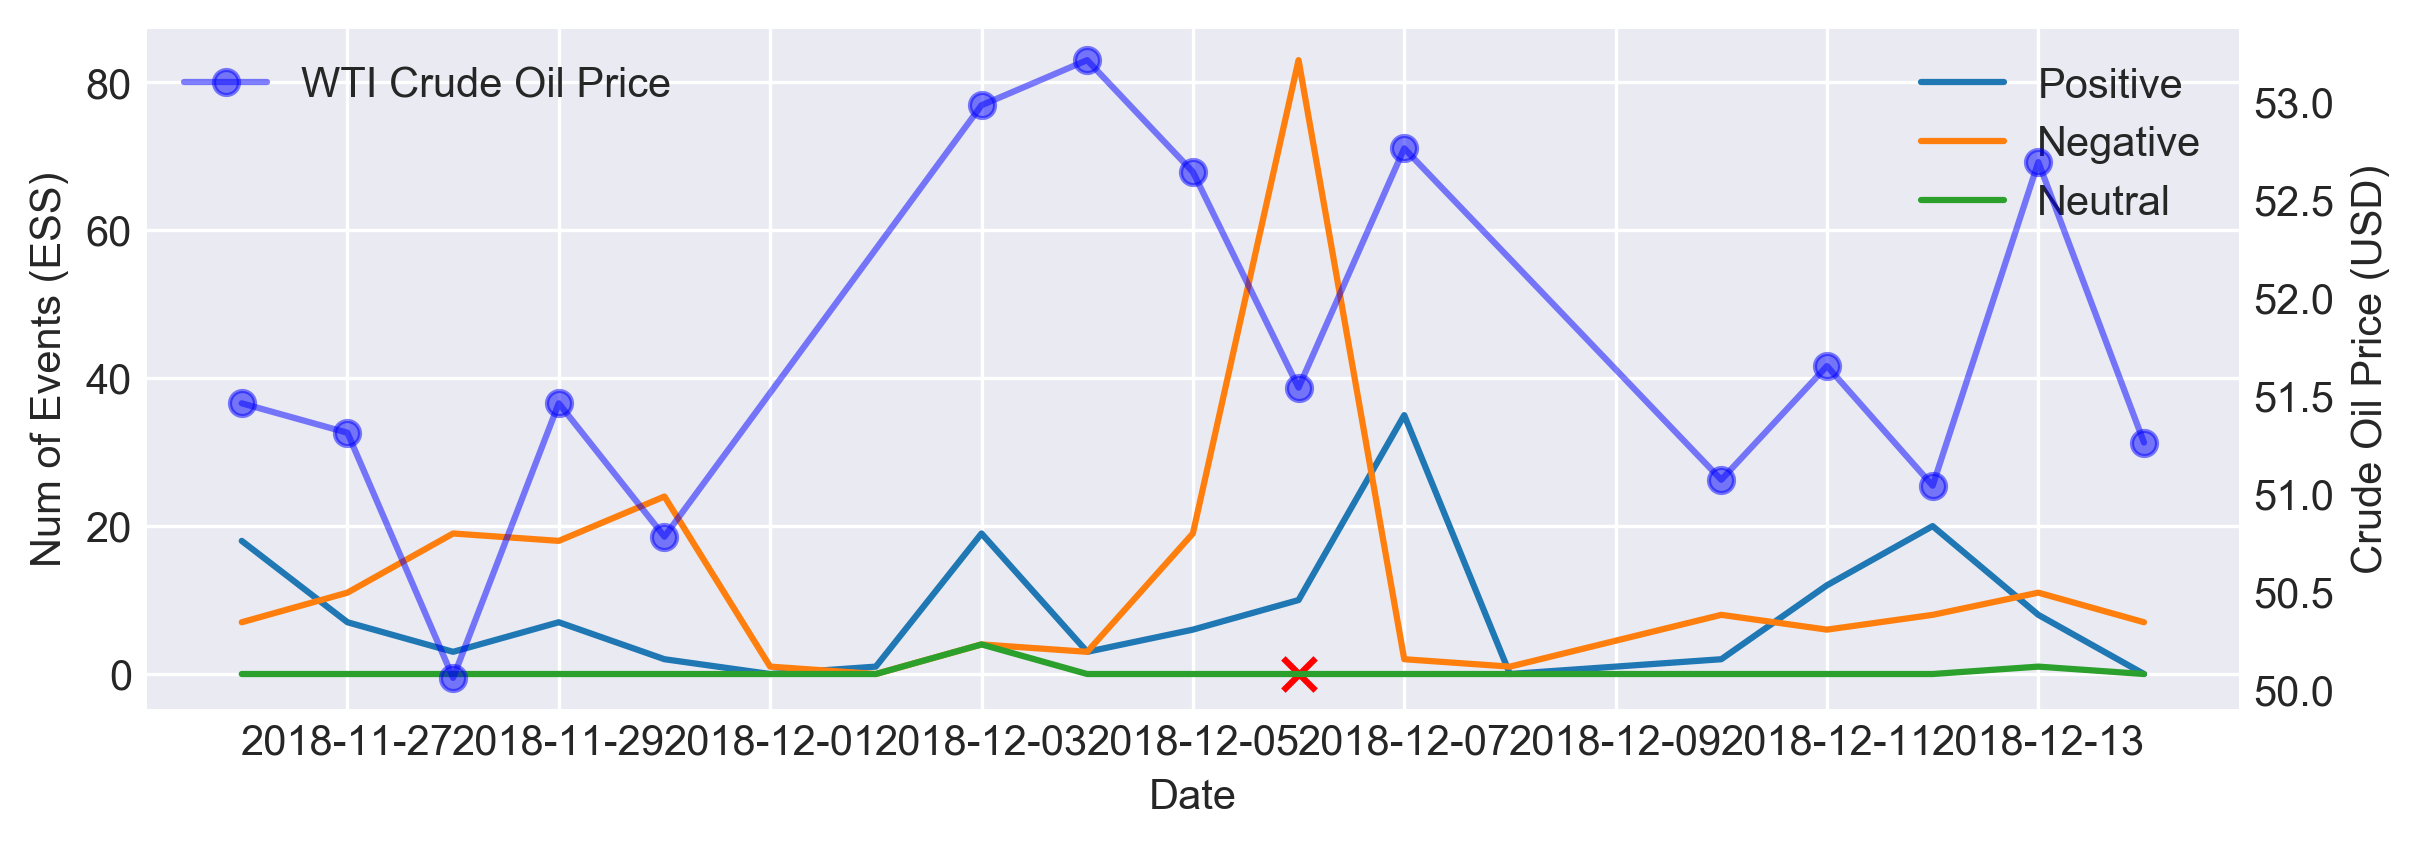

In [53]:
date = datetime(2018, 12, 6)
ts_centre_plot(df, df_oil, "ESS", date, delta_days=45, save_to=fig_path+"20181206_45d.png")
ts_centre_plot(df, df_oil, "ESS", date, delta_days=10, save_to=fig_path+"20181206_10d.png")

# Case 3: Jun. 12 ~ 13, 2019: Negative --> Positive Shifting (Gulf of Oman incident on Jun. 13)
> (From wikipedia) Following a month-long decrease, the price of oil initially increased by 4% after the incident, then settled to an increase of 2%. The increase in oil prices has been attributed to uncertainty regarding the supply of oil, due to reduced shipping in the Strait of Hormuz as a result of this incident

<https://en.wikipedia.org/wiki/June_2019_Gulf_of_Oman_incident>

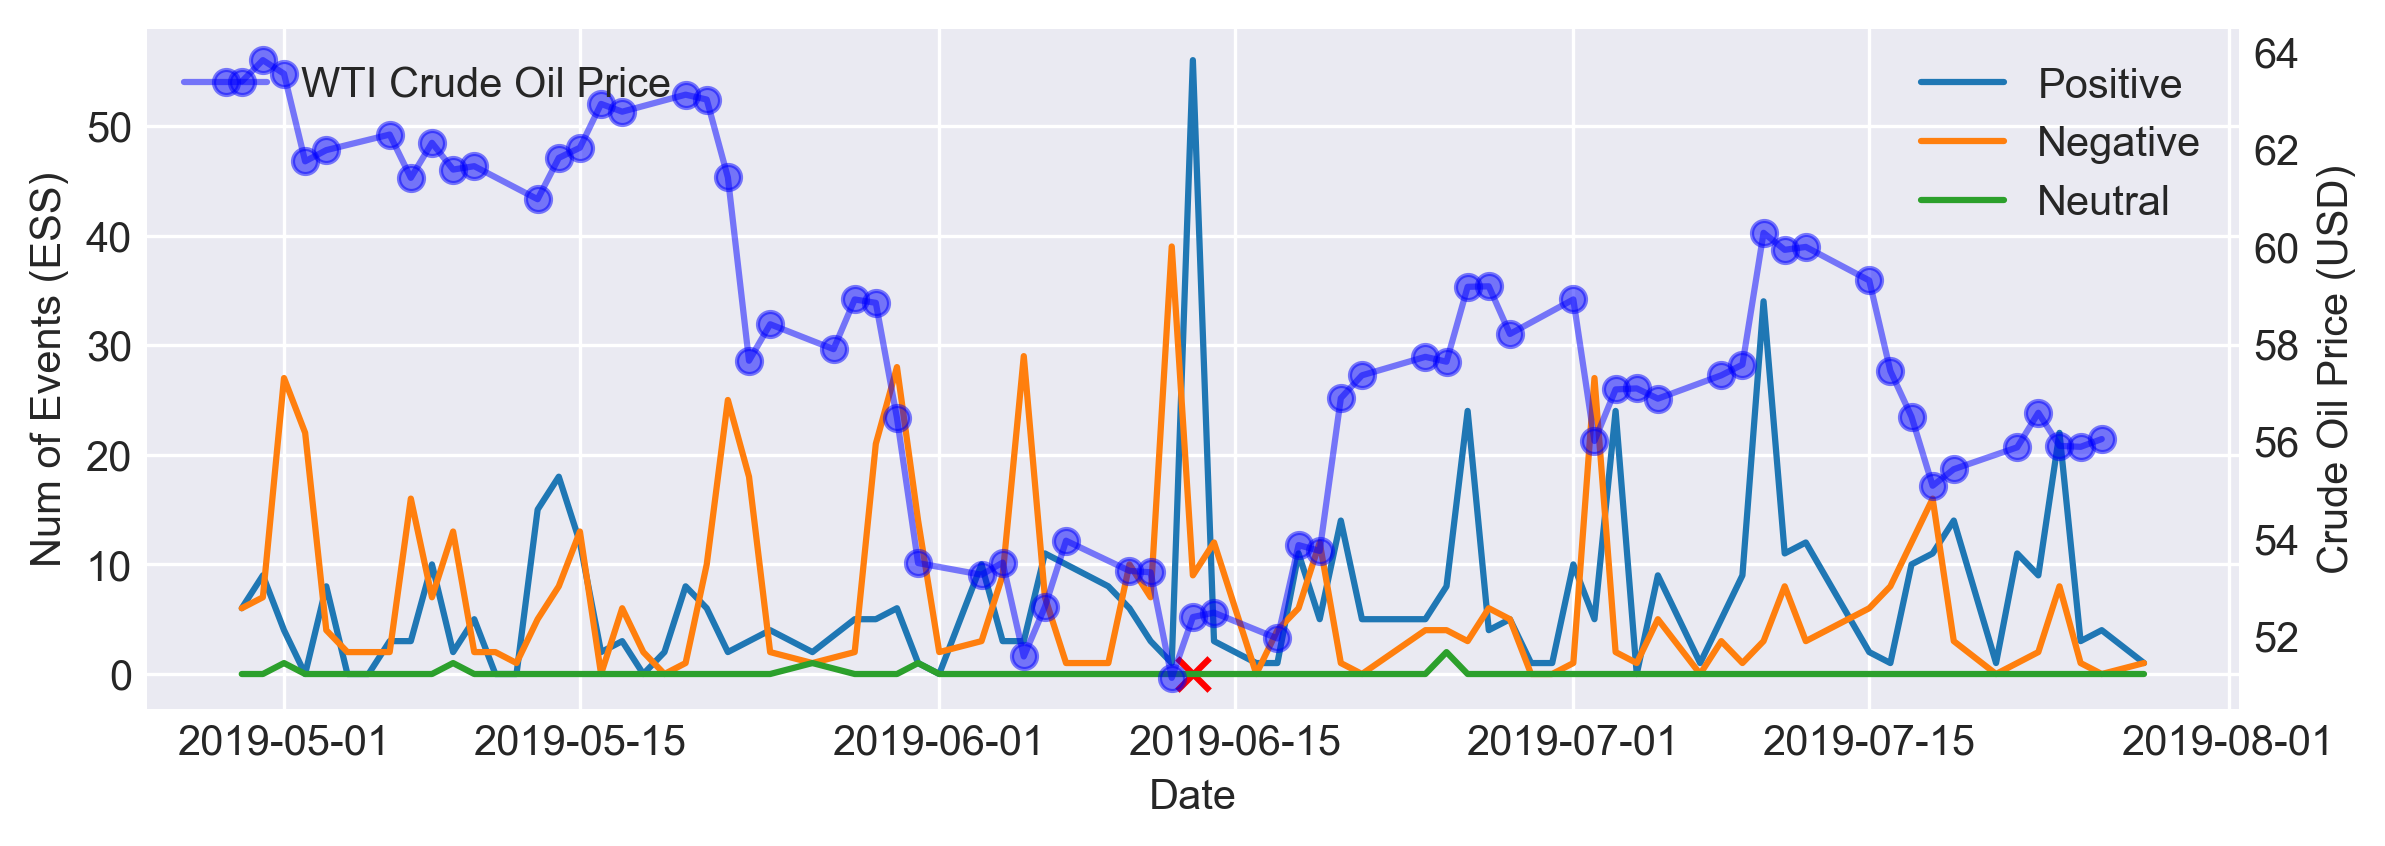

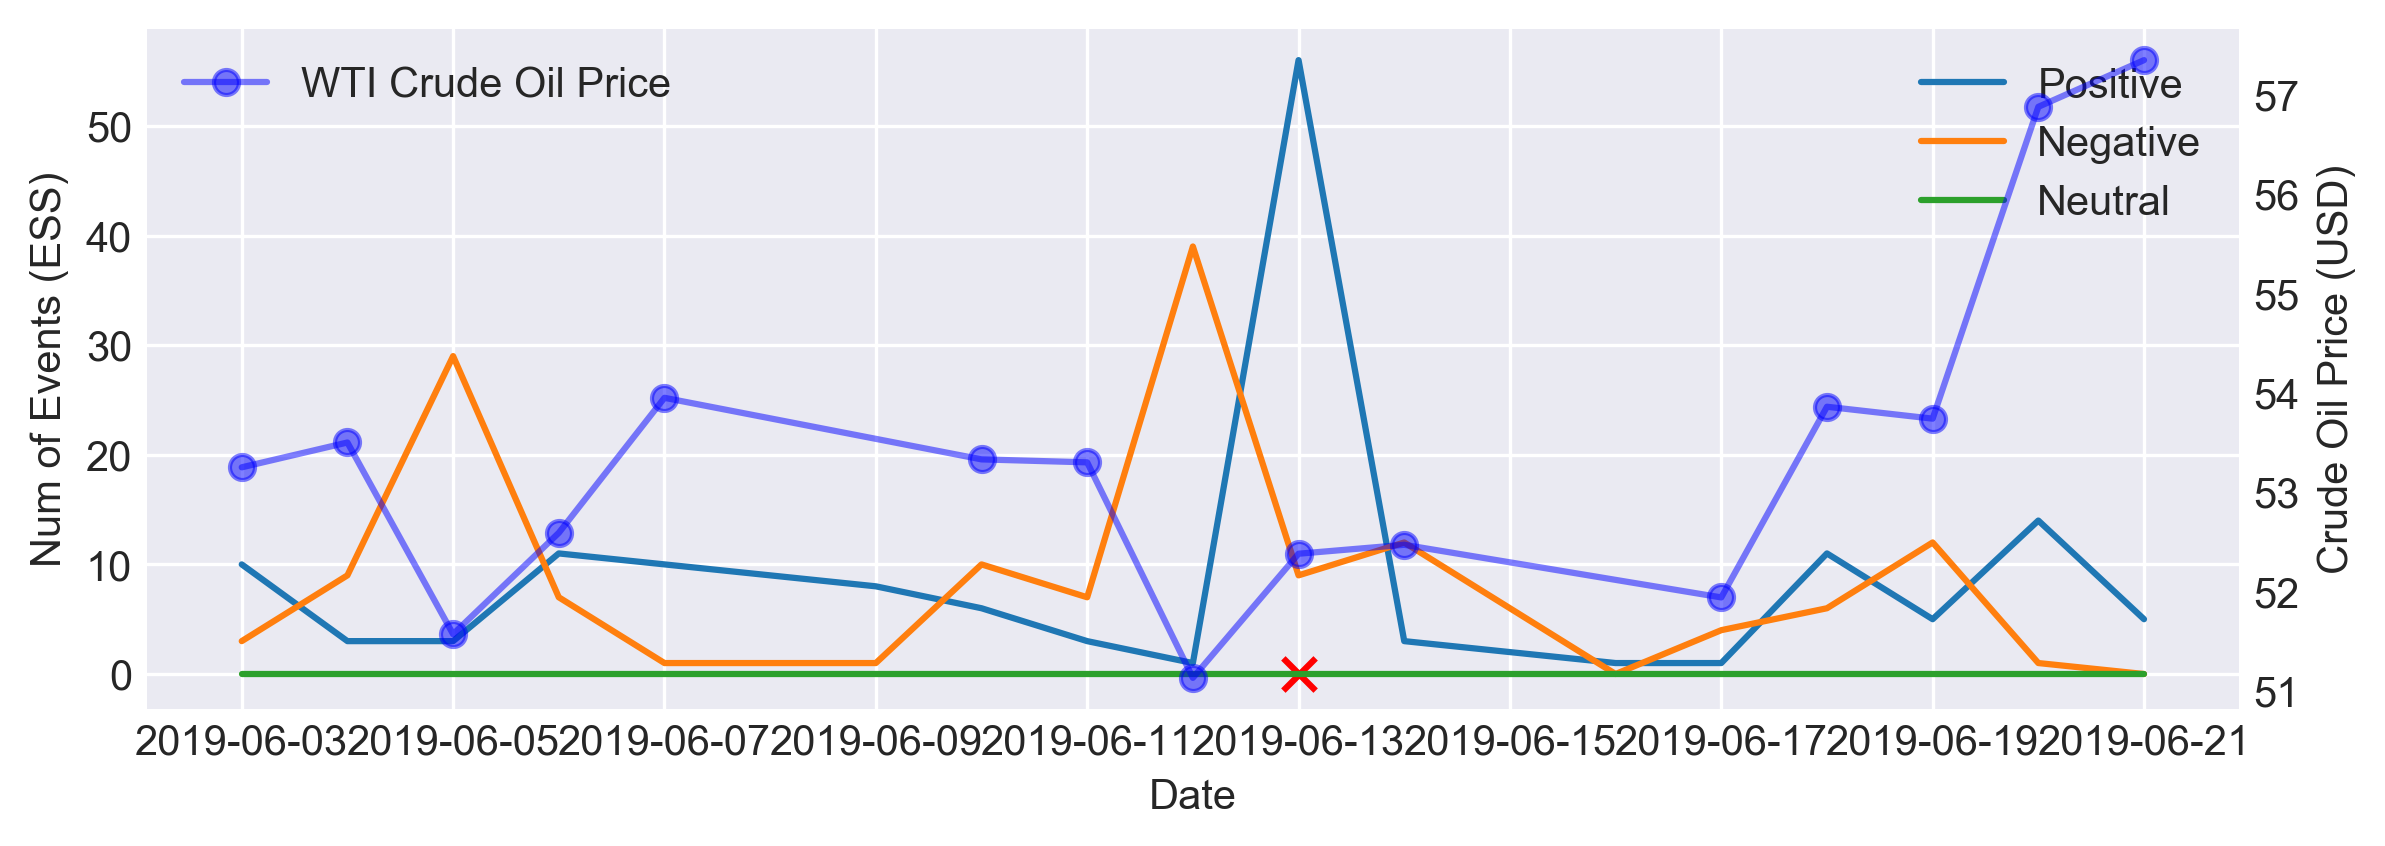

In [55]:
date = datetime(2019, 6, 13)
ts_centre_plot(df, df_oil, "ESS", date, delta_days=45, save_to=fig_path+"20190612_45d.png")
ts_centre_plot(df, df_oil, "ESS", date, delta_days=10, save_to=fig_path+"20190612_10d.png")